## ISOM5160 Exercise 05 - Donald Trump's Tweets
---
This dataset contains Donald Trump's Twitter tweets from 16/7/2015 to 11/11/2016, extracted from [https://www.thetrumparchive.com/](https://www.thetrumparchive.com/).

The dataset contains 7375 rows and 10 columns
* ```Date``` - the date of the tweet
* ```Time``` - the time of the tweet
* ```Tweet_Text``` - the text content of the tweet
* ```Type``` - the type of the tweet
* ```Media_Type``` -  the type of media inside the tweet
* ```Hashtags``` - the hashtags in the tweet
* ```Tweet_Id``` the id of the tweet
* ```Tweet_Url``` the url of the tweet
* ```Tweet_Favoriates``` the number of likes for the tweet
* ```Retweets``` the number of times the tweet has been re-tweeted 



#### Task 5.0: Imports packages and the data file

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import string, re

# To print multiple outputs for one cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

#pd.options.display.max_colwidth = None   # for Google Colab
pd.options.display.max_colwidth = -1      # for Jupyter Notebook

<ipython-input-1-23202b8c446b>:11: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.options.display.max_colwidth = -1      # for Jupyter Notebook


In [2]:
tweets = pd.read_csv('trump_tweets.csv')

tweets.shape
tweets.info()
tweets.head(5)

tweets.Tweet_Text

(7375, 10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7375 entries, 0 to 7374
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              7375 non-null   object 
 1   Time              7375 non-null   object 
 2   Tweet_Text        7375 non-null   object 
 3   Type              7375 non-null   object 
 4   Media_Type        1225 non-null   object 
 5   Hashtags          2031 non-null   object 
 6   Tweet_Id          7375 non-null   float64
 7   Tweet_Url         7375 non-null   object 
 8   Tweet_Favourites  7375 non-null   int64  
 9   Retweets          7375 non-null   int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 576.3+ KB


,Date,Time,Tweet_Text,Type,Media_Type,Hashtags,Tweet_Id,Tweet_Url,Tweet_Favourites,Retweets
0,16-11-11,15:26:37,Today we express our deepest gratitude to all those who have served in our armed forces. #ThankAVet https://t.co/wPk7QWpK8Z,text,photo,ThankAVet,7.970000e+17,https://twitter.com/realDonaldTrump/status/797098212599496704,127213,41112
1,16-11-11,13:33:35,Busy day planned in New York. Will soon be making some very important decisions on the people who will be running our government!,text,NaN,NaN,7.970000e+17,https://twitter.com/realDonaldTrump/status/797069763801387008,141527,28654
2,16-11-11,11:14:20,Love the fact that the small groups of protesters last night have passion for our great country. We will all come together and be proud!,text,NaN,NaN,7.970000e+17,https://twitter.com/realDonaldTrump/status/797034721075228672,183729,50039
3,16-11-11,2:19:44,"Just had a very open and successful presidential election. Now professional protesters, incited by the media, are protesting. Very unfair!",text,NaN,NaN,7.970000e+17,https://twitter.com/realDonaldTrump/status/796900183955095552,214001,67010
4,16-11-11,2:10:46,"A fantastic day in D.C. Met with President Obama for first time. Really good meeting, great chemistry. Melania liked Mrs. O a lot!",text,NaN,NaN,7.970000e+17,https://twitter.com/realDonaldTrump/status/796897928048766976,178499,36688


0       Today we express our deepest gratitude to all those who have served in our armed forces. #ThankAVet https://t.co/wPk7QWpK8Z                 
1       Busy day planned in New York. Will soon be making some very important decisions on the people who will be running our government!           
2       Love the fact that the small groups of protesters last night have passion for our great country. We will all come together and be proud!    
3       Just had a very open and successful presidential election. Now professional protesters, incited by the media, are protesting. Very unfair!  
4       A fantastic day in D.C. Met with President Obama for first time. Really good meeting, great chemistry. Melania liked Mrs. O a lot!          
                                                                       ...                                                                          
7370    I loved firing goofball atheist Penn @pennjillette on The Apprentice. He never had a chance. Wrote

#### **Task 5.1:** Find all tweet texts containing both 'Mexico' and 'America' (match the exact and whole word)
- Hint: use Regex patten *r'\bMexico\b'*

In [3]:
pattern_mexico = r'\bMexico\b'
pattern_america = r'\bAmerica\b'

text_list = list(tweets["Tweet_Text"])

for i in range(len(text_list)):
    if(re.findall(pattern_mexico, text_list[i]) and re.findall(pattern_america, text_list[i])):
        print(i, text_list[i])

3269 Now an additional 600-700 jobs in America (2,000) being eliminated for move to Mexico- via Hartford Courant. https://t.co/bOIYQLqGRG
7020 "@Foshay504: @greta DonaldTrump-Love him! Its time to run America like a business. Weve given all our wealth to China n Mexico!! No more!


#### **Task 5.2:** Find out how many times the slogan “Make America Great Again” (with or without spaces, upper or lower cases) appear in the tweet text

In [5]:
maga = r'\s*Make\s*America\s*Great\s*Again\s*'

maga_count = 0

for i in range(len(text_list)):
    if(re.findall(maga, text_list[i], flags=re.IGNORECASE)):
        maga_count += 1
        
maga_count

print("This slogan appears %d times." % maga_count )

724

This slogan appears 724 times.


#### **Task 5.3:** Find the tweet text with the most number of hashtags (i.e, sequence starting with #)

In [6]:
tweets.Hashtag_Count = tweets['Tweet_Text'].str.count("#")
max_ht = max(tweets.Hashtag_Count)
print('The tweet text with the most number of hashtags is: %s' % max_ht)

top = tweets.Tweet_Text[tweets.Hashtag_Count == max_ht].dropna

print(top)

The tweet text with the most number of hashtags is: 10
<bound method Series.dropna of 2720    RT @EricTrump: Friends in #FL #OH #NC #IL &amp; #MO we would be honored to have your #VOTE! #SuperTuesday #LetsDoThis #MakeAmericaGreatAgain #T_
Name: Tweet_Text, dtype: object>


<ipython-input-6-b00ee7785b18>:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  tweets.Hashtag_Count = tweets['Tweet_Text'].str.count("#")


#### **Task 5.4:** Find the top 10 frequent mentions in Trump's tweets (i.e., sequence starting with @)
- Hint: use *pd.Series.explode().to_frame()* function to convert a nested list into a dataframe


In [7]:
at_list = tweets.Tweet_Text.apply(lambda x: re.findall('@[a-zA-Z0-9_]+', x))

at_df = at_list.explode().to_frame().reset_index()

at_freq = at_df.groupby('Tweet_Text', as_index=False).agg({'index':'count'})
at_freq.columns = ['word', 'freq']
at_freq.sort_values(by='freq', ascending=False).head(10)

,word,freq
2437,@realDonaldTrump,1513
509,@FoxNews,272
242,@CNN,231
2289,@megynkelly,107
1960,@foxandfriends,100
365,@DanScavino,90
2523,@seanhannity,78
693,@JebBush,74
2380,@oreillyfactor,73
2373,@nytimes,65


#### **Task 5.5:** Plot the top 20 frequent words in Trump's tweets (excluding the words from *stopwords.txt*)
- Hint: use pattern '((https?://)+(\[\w\d:#@%/;$()~_?+-=\\.&\](#!)?)*)' to match url
- Hint: there are some special HTML charcter codes such as &amp;amp; (ampersanbd), &amp;gt; (greater than)
- Hint: the order when removing non-bword sequences: escape sequence -> html character code -> url -> hashtag/mention -> digit and punctuation

In [8]:
# To check how many tweet text contains special HTML characters codes
#tweets.Tweet_Text[tweets.Tweet_Text.apply(lambda x: re.search('(&\w+;)', x)).dropna().index]

charcodes = tweets.Tweet_Text.apply(lambda x: re.findall('(&\w+;)', x)).explode().dropna()
charcodes.to_frame().reset_index().groupby('Tweet_Text').count()

,index
Tweet_Text,
&amp;,627
&gt;,9


In [9]:
import string
stop_words = pd.read_csv('stopwords.txt', header=None, names=['stopwords'])
#stop_words

In [10]:
#pattern escape
esc = '\n'

#html
html = '(&\w+;)'

#url
url = '((https?://)+([\da-z\.-]+)\.([a-z\.]{2,6})([/\w \.-]*)*/?)'

#hashtag and mention
ht = '(#[a-zA-Z0-9_]+)'
mention= '(@[a-zA-Z0-9_]+)'

#punctuation
#string.punctuation
remove_chars = '[0-9' + string.punctuation + ']+'

words_list=[]

for i in range(len(text_list)):
    no_esc = re.sub(esc, '', text_list[i])
    no_html = re.sub(html, '', no_esc)
    no_url = re.sub(url, '', no_html)
    no_ht = re.sub(ht, '', no_url)
    no_mention = re.sub(mention, '', no_ht)
    no_chars = re.sub(remove_chars, '', no_mention)
    words_list.append(no_chars)
    
tweets['Words_List'] = words_list


clean_list = tweets.Words_List.apply(lambda x: x.split())
words_df = clean_list.explode().to_frame().reset_index()

#Lower Case
words_df.Words_List = words_df.Words_List.str.lower()
#words_df

words_freq = words_df.groupby('Words_List', as_index=False).agg({'index':'count'})
words_freq.columns = ['word', 'freq']
words_freq = words_freq.sort_values(by='freq', ascending=False)
#words_freq

#StopWords
clean_words = words_freq.loc[words_freq.word.isin(stop_words.stopwords)==False, :]
#clean_words


top20 = clean_words.sort_values(by='freq', ascending=False).head(20)
top20

,word,freq
7889,trump,1137
3349,hillary,531
259,america,479
6277,rt,446
5330,people,441
5512,poll,350
2126,donald,321
1323,clinton,308
5613,president,265
8238,vote,253


<BarContainer object of 20 artists>

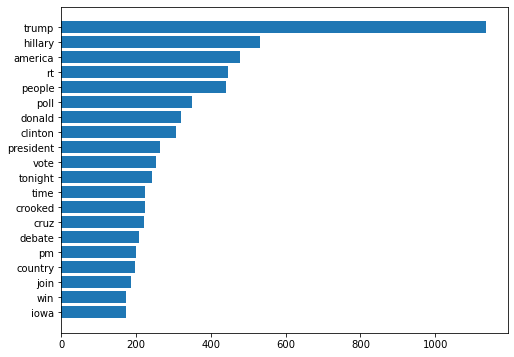

In [11]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8, 6))

ax.barh(top20.word[::-1], width=top20.freq[::-1])